# Mission n° 1
Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from datetime import datetime


#datasets
df = pd.read_csv ('dataframe.csv')
customers = pd.read_csv ('customers.csv')
products = pd.read_csv ('products.csv')
transactions = pd.read_csv ('transactions.csv')

# Pour chaque df : nous allons tout d abord l analyser puis chercher le nettoyer

### Mission n° 2

Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

 - des indicateurs de tendance centrale et de dispersion ;
 
 - une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
 - des représentations graphiques, dont au moins un histogramme, 
 - une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
 - des analyses bivariées.

----------------------------------------
Pour la categorie 0 :

Il y a 190771 produits répertoriés pour cette catégorie.
Les indicateurs de tendance centrale :
    La moyenne 10.649580168282066
    La mediane 9.99
    La modalité 4.99 
Les indicateurs de dispertions :
    L ecart type 4.931534880895493
    


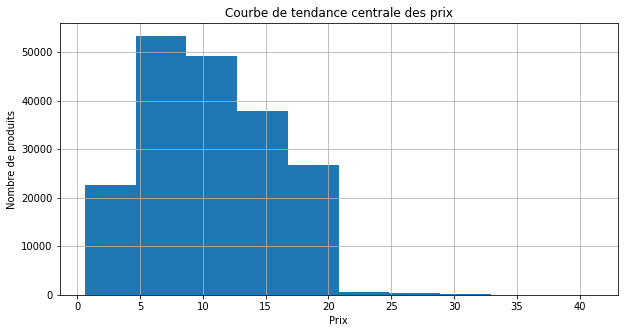

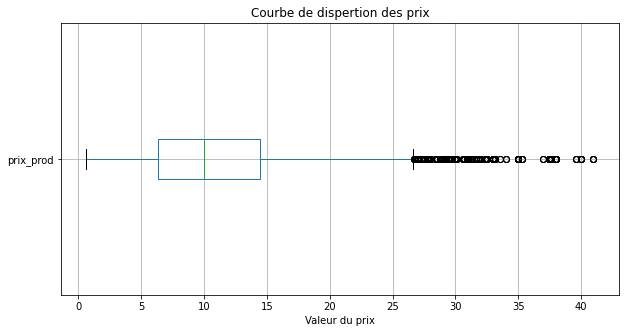

----------------------------------------
Pour la categorie 1 :

Il y a 108069 produits répertoriés pour cette catégorie.
Les indicateurs de tendance centrale :
    La moyenne 20.483414207593718
    La mediane 19.08
    La modalité 15.99 
Les indicateurs de dispertions :
    L ecart type 7.576757876759785
    


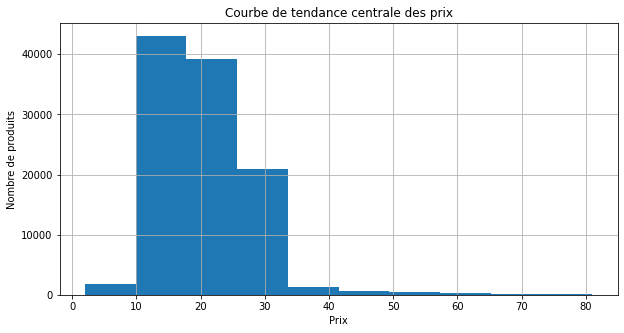

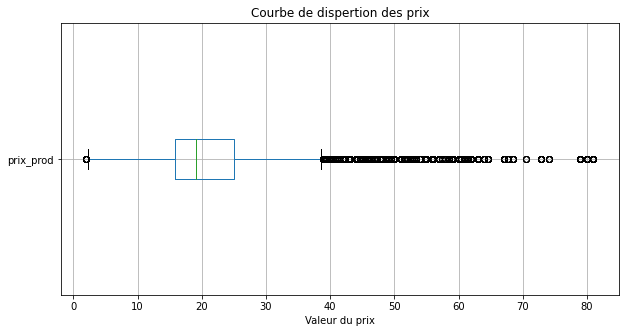

----------------------------------------
Pour la categorie 2 :

Il y a 16392 produits répertoriés pour cette catégorie.
Les indicateurs de tendance centrale :
    La moyenne 75.23737249877682
    La mediane 62.83
    La modalité 68.99 
Les indicateurs de dispertions :
    L ecart type 39.19621374655829
    


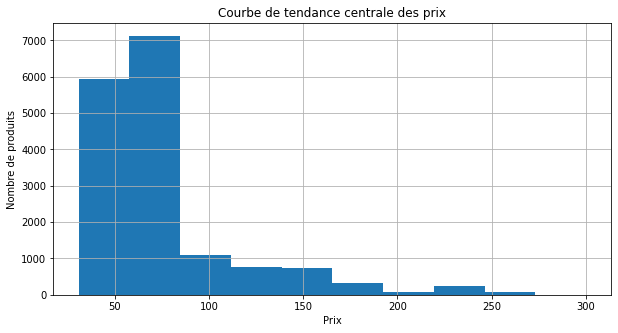

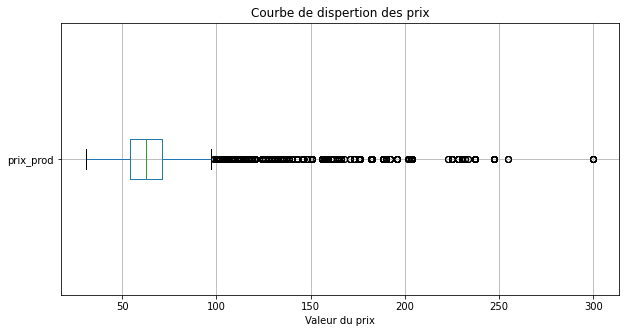

In [2]:
# des indicateurs de tendance centrale et de dispersion ;

for cat in df["categorie_prod"].sort_values().unique():
    subset = df[df.categorie_prod == cat] # Création du sous-échantillon
    print("-"*40)
    print('Pour la categorie {} :'.format (cat))

    print('''
Il y a {} produits répertoriés pour cette catégorie.
Les indicateurs de tendance centrale :
    La moyenne {}
    La mediane {}
    La modalité {} 
Les indicateurs de dispertions :
    L ecart type {}
    '''.format ( len (subset)  ,  subset['prix_prod'].mean() ,  subset['prix_prod'].median() , subset['prix_prod'].mode().sum ()  ,subset['prix_prod'].std() )  )
    
    # Courbe de tendance centrale
    subset["prix_prod"].hist( figsize = (10,5) ) 
    plt.xlabel ('Prix')
    plt.ylabel ('Nombre de produits')
    plt.title ('Courbe de tendance centrale des prix')
    plt.show()
    
    # Courbe de dispersion
    subset.boxplot(column="prix_prod", vert=False , figsize = (10,5))
    plt.xlabel ('Valeur du prix')
    plt.ylabel ('')
    plt.title ('Courbe de dispertion des prix')
    plt.show() 

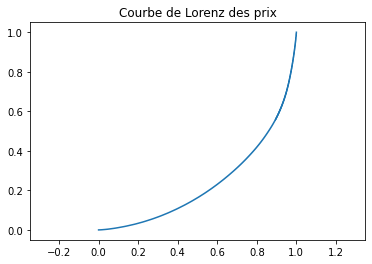

L indice de Gini : 0.5317286330993778


In [3]:
# une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;

import numpy as np
  
depenses = products [ products ['price'] > 0]      #valeur > 0 

dep = depenses['price'].values   #np

n = len(dep)   #len

lorenz = np.cumsum(np.sort(dep)) / dep.sum()   #somme cumulée / somme np

lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis( 'equal' )   #

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

plt.plot(xaxis , lorenz , drawstyle = 'steps-post' )
plt.title('Courbe de Lorenz des prix')
plt.show()



AUC = ( lorenz.sum() - lorenz [-1] / 2 - lorenz [0] / 2 ) / n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2 * S
print ('L indice de Gini :',gini)


In [4]:
# des représentations graphiques, dont au moins un histogramme

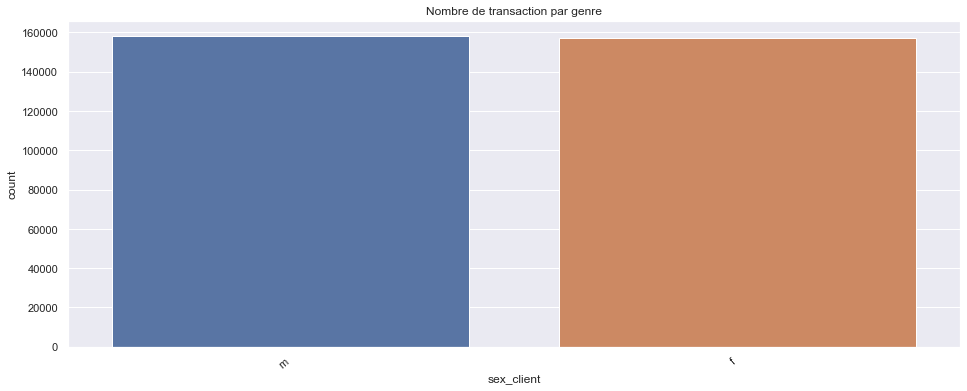

In [5]:
import seaborn as sns
sns.set() #chrger le theme
df = df.reset_index()

plt.figure(figsize=(16,6)) 
ax =  sns.countplot(df['sex_client']) ; 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title ('Nombre de transaction par genre')
plt.show()

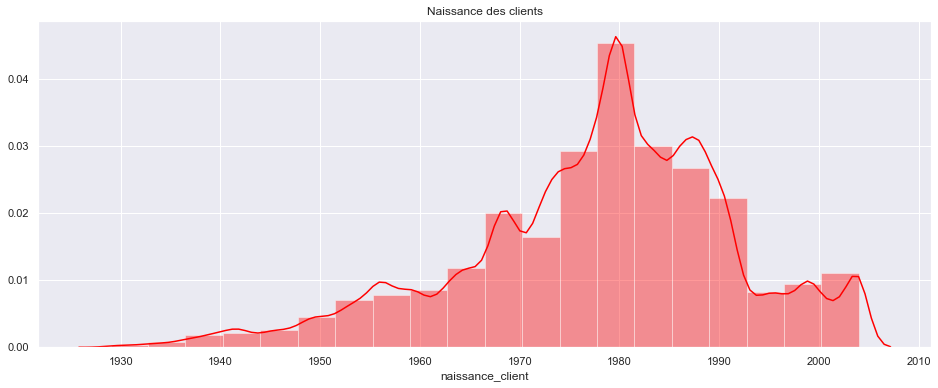

In [6]:
plt.figure(figsize=(16,6)) 
sns.distplot(df['naissance_client'],20, color = 'red')
plt.title ('Naissance des clients') ; 

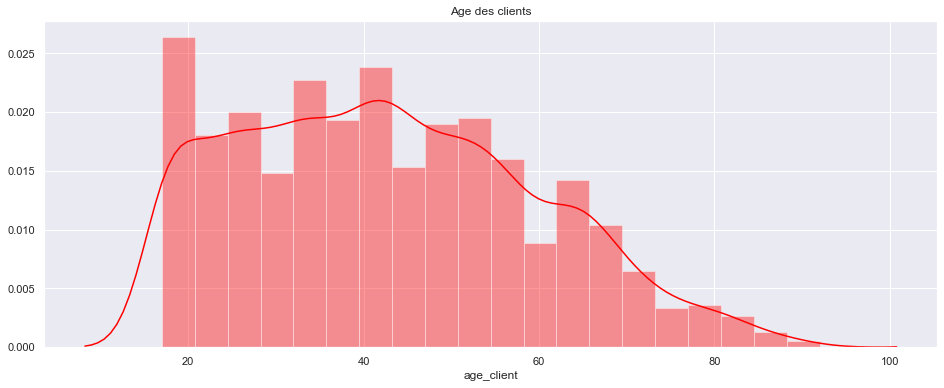

In [7]:
plt.figure(figsize=(16,6)) 
# sns.kdeplot(df['age_client'], shade=True, cut = 0);
sns.distplot(df.groupby ('client_id').agg('mean') ['age_client'],20, color = 'red')
plt.title ('Age des clients') ; 

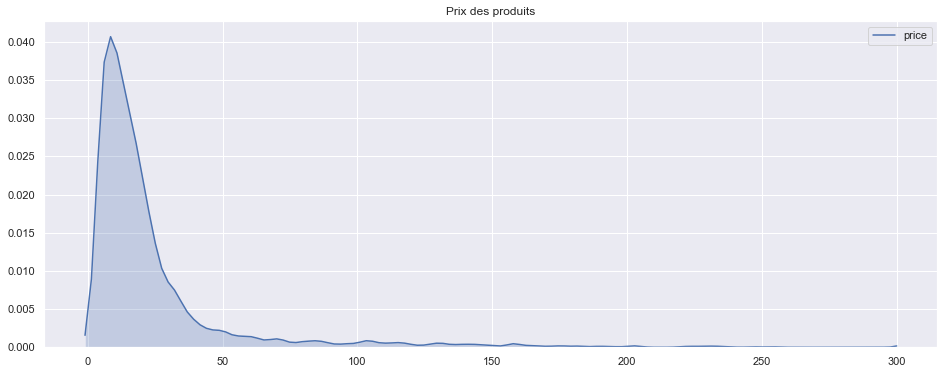

In [8]:
plt.figure(figsize=(16,6)) 
sns.kdeplot(products['price'], shade=True, cut = 0);
plt.title ('Prix des produits') ; 

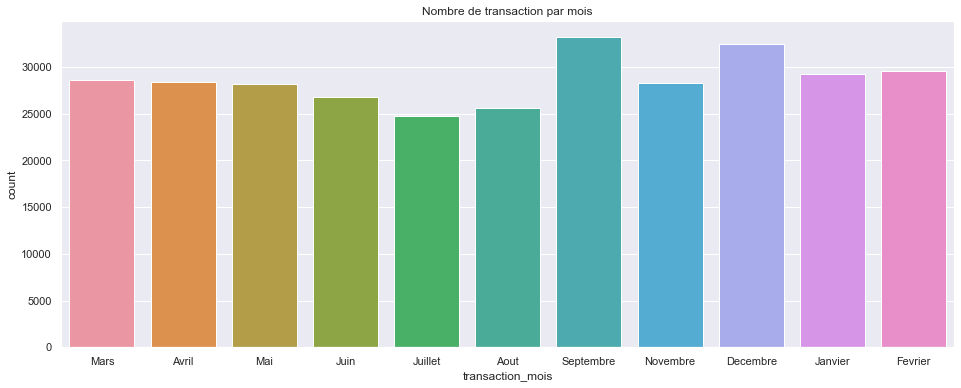

In [9]:
plt.figure(figsize=(16,6)) 
sns.countplot(df['transaction_mois']) ; 
plt.title ('Nombre de transaction par mois') ; 

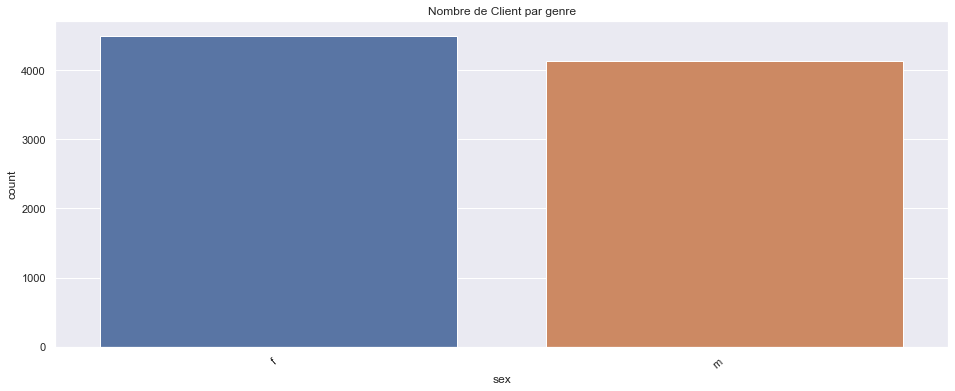

In [10]:
plt.figure(figsize=(16,6)) 
ax =  sns.countplot(customers['sex']) ; 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title ('Nombre de Client par genre')
plt.show()

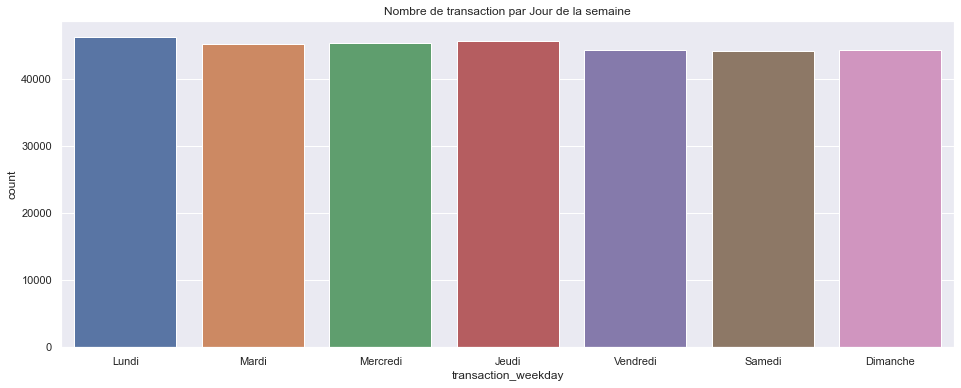

In [11]:
plt.figure(figsize=(16,6)) 
sns.countplot(df['transaction_weekday']) ; 
plt.title ('Nombre de transaction par Jour de la semaine') ; 

In [12]:
# une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;

<Figure size 1152x432 with 0 Axes>

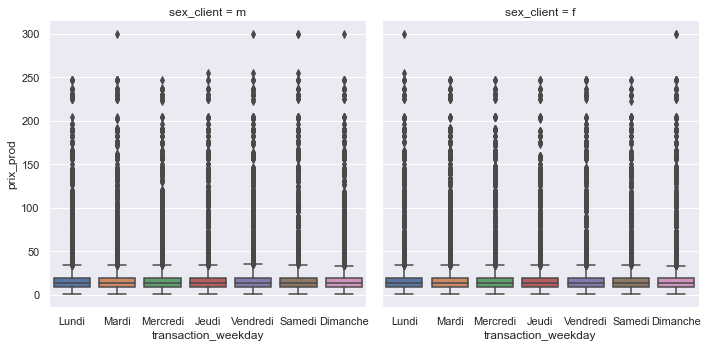

In [13]:
plt.figure(figsize=(16,6)) 
# sns.countplot(df['transaction_weekday']) ; 
sns.catplot(x="transaction_weekday", y="prix_prod", kind="box", col='sex_client', data=df);
plt.xticks( [ 0 , 1 ,2 ,3 ,4 ,5 ,6] , ['Lundi' ,'Mardi' , 'Mercredi' , 'Jeudi' , 'Vendredi' , 'Samedi' , 'Dimanche' ] ) ; 
# plt.title ('Nombre de transaction par Jour de la semaine') ; 

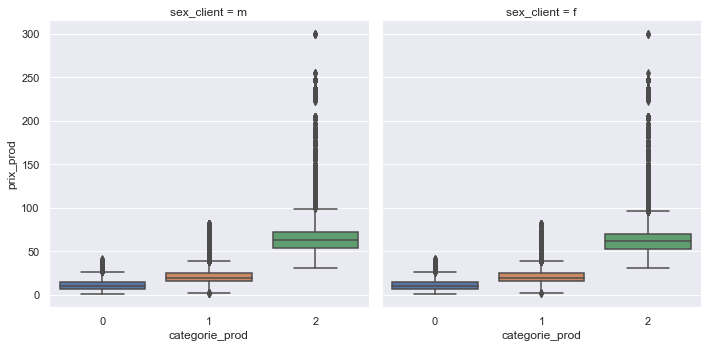

In [14]:
sns.catplot(x="categorie_prod", y="prix_prod", kind="box", col='sex_client', data=df);

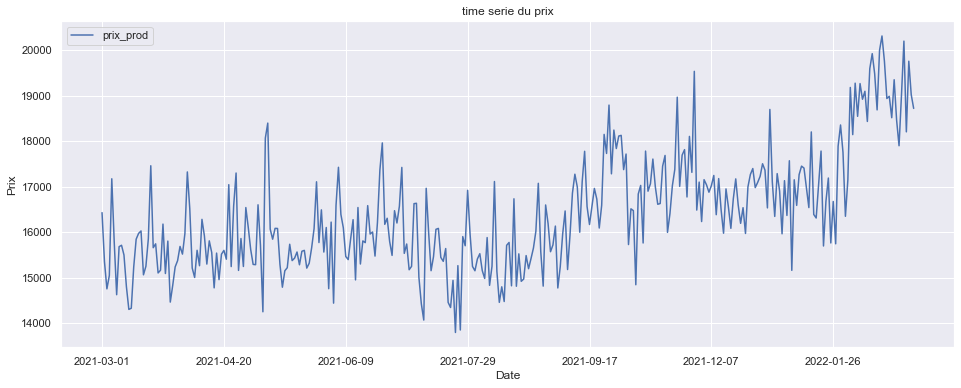

In [15]:
#time series
x = df.groupby('transaction_date').agg( {'prix_prod' : 'sum' } )


df.groupby (  'transaction_date' ).agg(  {'prix_prod' : 'sum' }  ).plot( figsize = (16,6)  )
plt.title ('time serie du prix')
plt.xlabel ('Date')
plt.ylabel ('Prix')
plt.show();


In [16]:
#des analyses bivariées

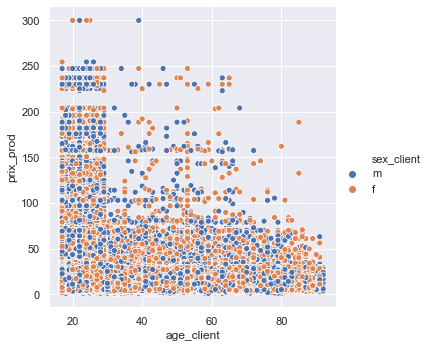

In [17]:
sns.relplot(x = 'age_client',y= 'prix_prod', data = df, hue = 'sex_client' , sizes = 10);

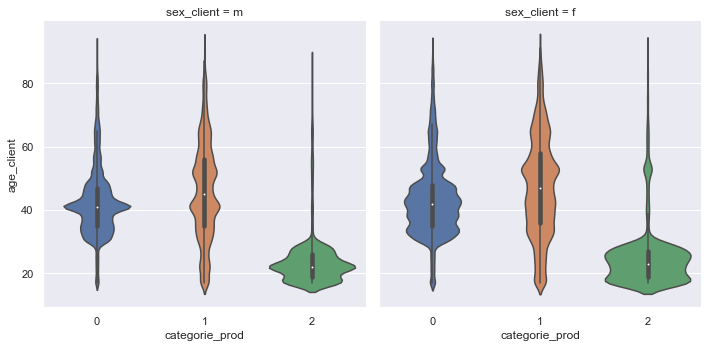

In [18]:
sns.catplot(x="categorie_prod", y="age_client", kind="violin", col='sex_client', data=df);

### Mission n° 3
Voici quelques questions supplémentaires, que votre manager vous a posées :

Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
Y a-t-il une corrélation entre l'âge des clients et :
Le montant total des achats ;
La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
La taille du panier moyen (en nombre d’articles) ;
Les catégories de produits achetés.

In [19]:
import seaborn as sns
sns.set() #chrger le theme
df = df.join( pd.get_dummies (data = df ['sex_client'],    prefix = 'sexe') )

In [20]:
# sns.pairplot(df)

### Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

sex_client          f      m
categorie_prod              
0               94728  96043
1               54657  53412
2                7703   8689
Correlation sexe / categorie : 1.56 %


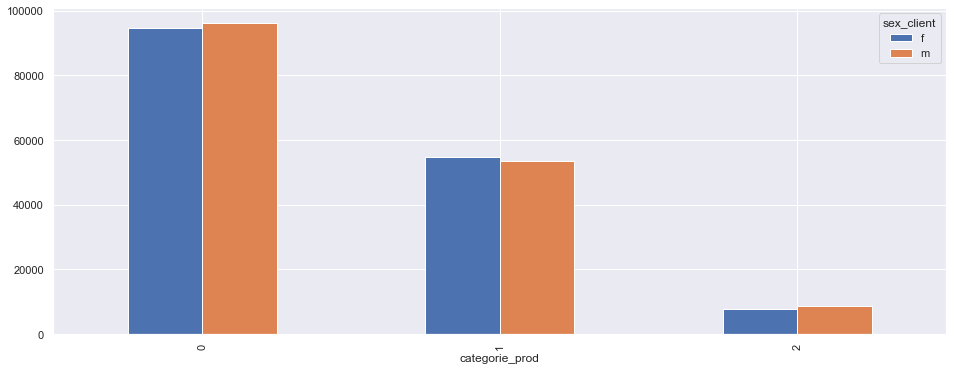

In [21]:
from scipy.stats import chi2_contingency


def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))



table = pd.crosstab( df['categorie_prod'] , df['sex_client'] )
print (table)

table.plot(kind ='bar' , figsize = (16,6)) ;


print ('Correlation sexe / categorie :', round (V_Cramer(table,df.shape[0]) * 100  , 2  ),'%')

sex_client          f      m
categorie_prod              
0               94728  96043
1               54657  53412
2                7703   8689
la valeur de khi 2 est : 79.18 



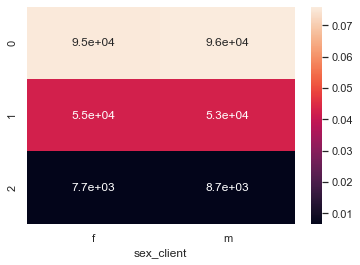

In [22]:
# table
table = pd.crosstab( df['categorie_prod'] , df['sex_client'] )
print (table)


#khi 2
chi2, p_val, dof, expect = chi2_contingency(table)
print("la valeur de khi 2 est : {} \n".format(round(chi2,2)))

table['Total'] = table['f'] + table['m']


table = table.append ( pd.DataFrame ([table['f'].sum() ,table['m'].sum(),table['Total'].sum()] , 
                             columns = ['Total'] , 
                             index = ['f'  ,    'm' ,  'Total'] ).T   )


#heatmap 1
tx = table.loc[:,["Total"]]
ty = table.loc[["Total"],:]
n = len(table)
indep = tx.dot(ty) / n


c = table.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
t = measure/xi_n


sns.heatmap(t.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

### Y a-t-il une corrélation entre l'âge des clients et Le montant total des achats ?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


           age_client  prix_prod
client_id                       
c_1                66     292.66
c_10               65     586.18
c_100              29     222.87
c_1000             55     928.05
c_1001             39    1009.67
...               ...        ...
c_995              66     119.08
c_996              51     725.61
c_997              27     514.90
c_998              20    1527.69
c_999              57     285.03

[8598 rows x 2 columns]


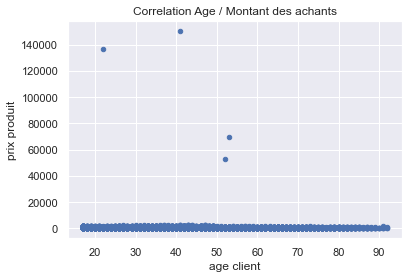

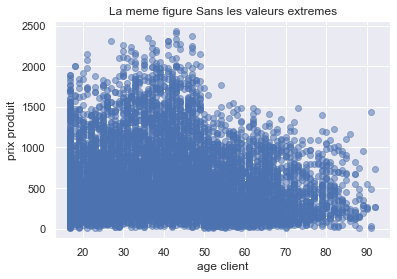

In [23]:
#groupby client 
df_c = df [['age_client' , 'client_id' , 'prix_prod' ]].groupby ('client_id').agg( {  'age_client' : 'mean' , 
                                                                                   'prix_prod' : 'sum' } )

print (df_c)

#plot 1 : il y a ds valeurs extremes
df_c.plot.scatter(   "age_client" , "prix_prod" )
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'Correlation Age / Montant des achants' )
plt.show()


df_c2 = df_c [ df_c ['prix_prod'] < 10000]

#plot
plt.plot( df_c2 ["age_client"] ,df_c2 ["prix_prod"] , 'o' , alpha=0.5 )
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'La meme figure Sans les valeurs extremes' )
plt.show()

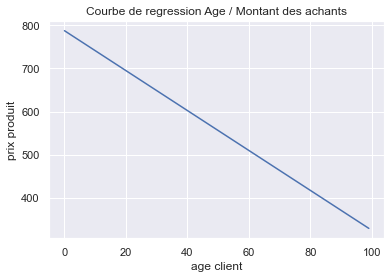

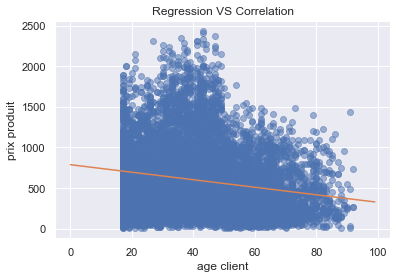

Avec les valeurs extremes : 
Coefficient de corrélation de Pearson : 3.8 %
Covariance empirique : 1.5e+03
Le Coefficient de détermination R² : 0.001427


Sans les valeurs extremes : 
Coefficient de corrélation de Pearson : 1.8e+01 %
Covariance empirique : 1.3e+03
Le Coefficient de détermination R² : 3.277



In [24]:
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import statsmodels.api as sm


#regression
Y = df_c2 ['prix_prod']
X = df_c2 [['age_client']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age_client'],result.params['intercept']
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)]) #plot
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'Courbe de regression Age / Montant des achants' )
plt.show()


#la courbe de regression VS de correlation
plt.plot( df_c2 ["age_client"] ,df_c2 ["prix_prod"] , 'o' , alpha=0.5 )
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)]) #plot
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'Regression VS Correlation' )
plt.show()



#indicateur
print ('Avec les valeurs extremes : ')

slope, intercept, r_value, p_value, std_err = linregress(df_c.age_client, df_c.prix_prod)
p_value = st.pearsonr(df_c ["age_client"],-df_c ["prix_prod"])[0] * 100 
conv    = np.cov(df_c["age_client"],-df_c["prix_prod"],ddof=0)[1,0] 

print('''Coefficient de corrélation de Pearson : {:.2} %
Covariance empirique : {:.2}
Le Coefficient de détermination R² : {:.4}
'''.format ( p_value , conv ,  r_value**2   )  ) 

print ('\nSans les valeurs extremes : ')

slope, intercept, r_value, p_value, std_err = linregress(df_c2.age_client, df_c2.prix_prod)     
p_value = st.pearsonr(df_c2 ["age_client"],-df_c2 ["prix_prod"])[0] * 100 
conv    = np.cov(df_c2["age_client"],-df_c2["prix_prod"],ddof=0)[1,0] 

print('''Coefficient de corrélation de Pearson : {:.2} %
Covariance empirique : {:.2}
Le Coefficient de détermination R² : {:.4}
'''.format ( p_value , conv , r_value**2 *100 )  ) 

### Y a-t-il une corrélation entre l'âge des clients et La fréquence d’achat (ie. nombre d'achats par mois par exemple) ?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


           age_client  transaction_mois
client_id                              
c_1                66                19
c_10               65                28
c_100              29                 6
c_1000             55                53
c_1001             39                52
...               ...               ...
c_995              66                 8
c_996              51                41
c_997              27                22
c_998              20                28
c_999              57                20

[8598 rows x 2 columns]


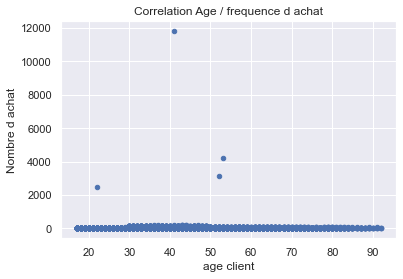

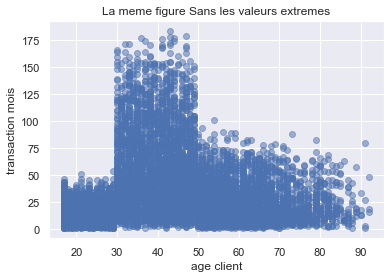

In [25]:
#groupby client 
df_c =  df [['age_client' , 'client_id' , 'prix_prod' ,'transaction_mois' ]].groupby ('client_id').agg( {  
                                                                                'age_client' : 'mean' , 
                                                                                 'transaction_mois' : 'count'   } )

print (df_c)

# #plot 1 : il y a ds valeurs extremes
df_c.plot.scatter(   "age_client" , "transaction_mois" )
plt.xlabel("age client")
plt.ylabel("Nombre d achat")
plt.title ( 'Correlation Age / frequence d achat' )
plt.show()


#Les valeurs extremes sont retirées
df_c2 = df_c [ df_c ['transaction_mois'] < 2000]

# #plot
plt.plot( df_c2 ["age_client"] ,df_c2 ["transaction_mois"] , 'o' , alpha=0.5 )
plt.xlabel("age client")
plt.ylabel("transaction mois")
plt.title ( 'La meme figure Sans les valeurs extremes' )
plt.show()

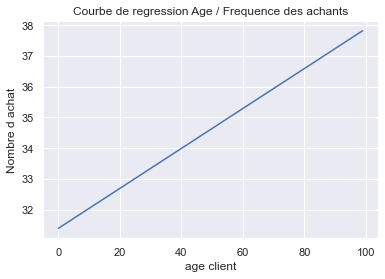

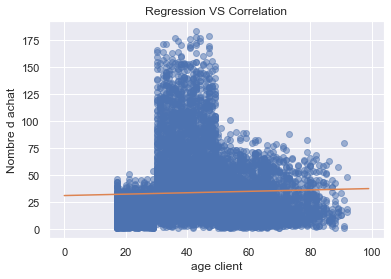

Avec les valeurs extremes : 
Coefficient de corrélation de Pearson : 0.76 %
Covariance empirique : 1.9e+01
Le Coefficient de détermination R² : 5.791e-05

Sans les valeurs extremes : 
Coefficient de corrélation de Pearson : 3.5 %
Covariance empirique : 1.9e+01
Le Coefficient de détermination R² : 0.124


In [26]:
#regression
Y = df_c2 ['transaction_mois']
X = df_c2 [['age_client']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age_client'],result.params['intercept']
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)]) #plot
plt.xlabel("age client")
plt.ylabel("Nombre d achat")
plt.title ( 'Courbe de regression Age / Frequence des achants' )
plt.show()


#la courbe de regression VS de correlation
plt.plot( df_c2 ["age_client"] ,df_c2 ["transaction_mois"] , 'o' , alpha=0.5 )
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)]) #plot
plt.xlabel("age client")
plt.ylabel("Nombre d achat")
plt.title ( 'Regression VS Correlation' )
plt.show()



#indicateur
print ('Avec les valeurs extremes : ')

slope, intercept, r_value, p_value, std_err = linregress(df_c.age_client, df_c.transaction_mois)
p_value = st.pearsonr(df_c ["age_client"],-df_c ["transaction_mois"])[0] * 100 
conv    = np.cov(df_c["age_client"],-df_c["transaction_mois"],ddof=0)[1,0] 

print('''Coefficient de corrélation de Pearson : {:.2} %
Covariance empirique : {:.2}
Le Coefficient de détermination R² : {:.4}'''.format ( -p_value , -conv ,  r_value**2   )  ) 

print ('\nSans les valeurs extremes : ')

slope, intercept, r_value, p_value, std_err = linregress(df_c2.age_client, df_c2.transaction_mois)     
p_value = st.pearsonr(df_c2 ["age_client"],-df_c2 ["transaction_mois"])[0] * 100 
conv    = np.cov(df_c2["age_client"],-df_c2["transaction_mois"],ddof=0)[1,0] 

print('''Coefficient de corrélation de Pearson : {:.2} %
Covariance empirique : {:.2}
Le Coefficient de détermination R² : {:.4}'''.format ( -p_value , -conv , r_value**2 *100 )  ) 

### Y a-t-il une corrélation entre l'âge des clients et La taille du panier moyen (en nombre d’articles) ;

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


            age_client  prix_prod
session_id                       
s_1                 54          1
s_10                51          1
s_100               43          2
s_1000              32          4
s_10000             32          3
...                ...        ...
s_9995              47          2
s_9996              17          8
s_9997              63          1
s_9998              31          1
s_9999              37          3

[157648 rows x 2 columns]
    age_client  prix_prod
0           17   1.773988
1           18   1.733503
2           19   1.755630
3           20   1.743935
4           21   1.843330
..         ...        ...
71          88   1.407407
72          89   1.516129
73          90   1.772727
74          91   1.608696
75          92   1.354839

[76 rows x 2 columns]


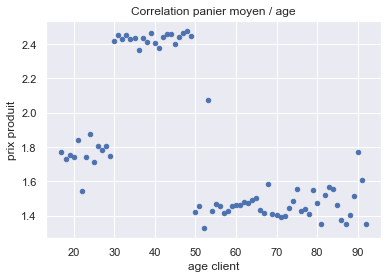

In [27]:
#groupby session_id 
df_c = df [['age_client' , 'session_id' , 'prix_prod' ]].groupby ('session_id').agg( {  'age_client' : 'mean' , 
                                                                                   'prix_prod' : 'count' } )

print (df_c)


#groupby age 
df_c = df_c [['age_client' ,  'prix_prod' ]].groupby ('age_client').agg( {  'prix_prod' : 'mean' } )
df_c = df_c.reset_index()
print (df_c)


#plot 1 : il y a ds valeurs extremes
df_c.plot.scatter(   "age_client" , "prix_prod" )
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'Correlation panier moyen / age' )
plt.show()


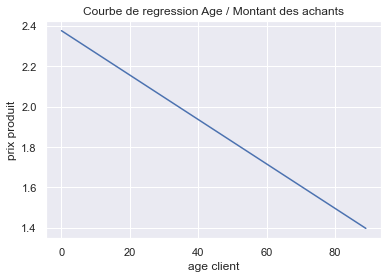

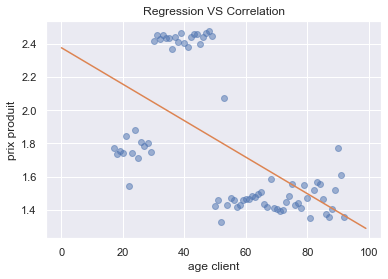

Avec les valeurs extremes : 
Coefficient de corrélation de Pearson : 5.8e+01 %
Covariance empirique : 5.3
Le Coefficient de détermination R² : 0.3333



In [28]:
#regression
Y = df_c ['prix_prod']
X = df_c [['age_client']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age_client'],result.params['intercept']
plt.plot(np.arange(90),[a*x+b for x in np.arange(90)]) #plot
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'Courbe de regression Age / Montant des achants' )
plt.show()


#la courbe de regression VS de correlation
plt.plot( df_c ["age_client"] ,df_c ["prix_prod"] , 'o' , alpha=0.5 )
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)]) #plot
plt.xlabel("age client")
plt.ylabel("prix produit")
plt.title ( 'Regression VS Correlation' )
plt.show()


#indicateur
print ('Avec les valeurs extremes : ')

slope, intercept, r_value, p_value, std_err = linregress(df_c.age_client, df_c.prix_prod)
p_value = st.pearsonr(df_c ["age_client"],-df_c ["prix_prod"])[0] * 100 
conv    = np.cov(df_c["age_client"],-df_c["prix_prod"],ddof=0)[1,0] 

print('''Coefficient de corrélation de Pearson : {:.2} %
Covariance empirique : {:.2}
Le Coefficient de détermination R² : {:.4}
'''.format ( p_value , conv ,  r_value**2   )  ) 

### Y a-t-il une corrélation entre l'âge des clients et Les catégories de produits achetés.

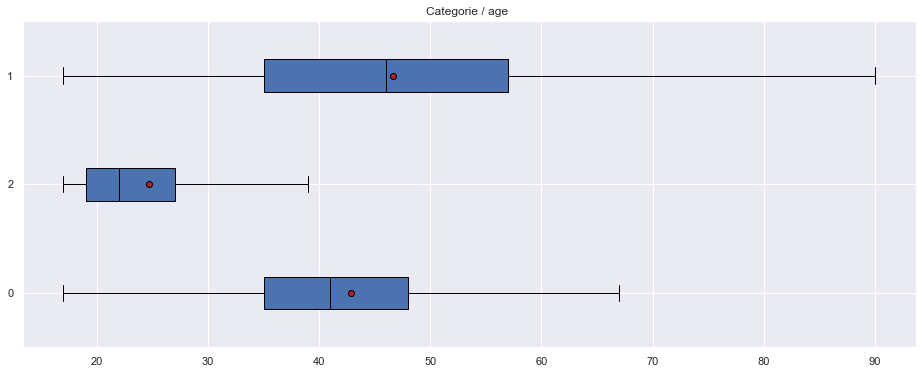

Le Coefficient de détermination : 11.84 %


In [29]:
X = "categorie_prod" # qualitative
Y = "age_client" # quantitative

sous_echantillon = df[df["age_client"] > 0] # On ne garde que les dépenses



modalites = df['categorie_prod'].unique()
groupes = []
for m in modalites:
    groupes.append(df[df['categorie_prod']==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure (figsize = (16,6))    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Categorie / age ')
plt.show()


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT



print ('Le Coefficient de détermination :', round ( eta_squared( sous_echantillon[X],sous_echantillon[Y] ) 
                                            * 100 , 2 ) , '%')

### Livrables
Un fichier .zip contenant ces fichiers :

 - le script destiné à nettoyer le jeu de données ;
 - le script contenant les différentes analyses effectuées ;
 - les graphiques dans un format image (PNG ou JPG) ;
 - un court fichier README, contenant les explications pour lancer vos scripts.
 
Pour faciliter votre passage au jury, déposez sur la plateforme, dans un dossier nommé “P4_nom_prenom”, tous les livrables du projet. 

Chaque livrable doit être nommé avec le numéro du projet et selon l'ordre dans lequel il apparaît, par exemple “P4_01_scriptdonnées”, “P4_02_scriptanalyse”, et ainsi de suite.

### Soutenance

Vous serez amené à créer des graphiques. 
Il y a certains pièges dans lesquels il ne faut pas tomber : veillez bien à respecter les règles données dans ce chapitre. 
Pensez également à votre examinateur : si votre présentation n'est pas donnée en plein écran, et si l'écran de votre examinateur est plus petit que le vôtre, il risque de ne pas pouvoir lire correctement les graphiques, les légendes ou les noms des axes.

La soutenance, d'une durée de 30 minutes,  se déroule en 3 étapes :

 - Détail du nettoyage des données : quelles valeurs aberrantes et manquantes avez-vous trouvées, comment les avez-vous traitées, avez-vous effectué d'autres nettoyages ? (10 minutes)
 - Présentation de l'analyse demandée, à l'aide d'un logiciel de présentation adapté. (10 minutes)
 - Présentez votre analyse des corrélations, en les interprétant. (10 minutes)
 - Séance de questions-réponses éventuelle. 

Compétences évaluées
Maîtriser les concepts statistiques fondamentaux
Nettoyer un jeu de données
Décrire un jeu de données par la statistique descriptive